In [1]:
%%javascript
$.getScript('https://raw.githubusercontent.com/mlgill/ipython_notebook_goodies/gh-pages/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Challenge 4

| Title        | Answer                     |
| :---------- | :------------------------ |
| Topic:       | Linear Regression and Learning Curve | 
| Date:        | 2016/07/22                 |
| Name:        | Michelle L. Gill           |
| Worked with: | None                       | 

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [18]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import rmse

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')
colors = [sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[3]]

seed = 4444
np.random.seed(seed)

%matplotlib inline

## Question 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)
 
 (The second one should fit really well, since it has the same form as the underlying model!)

In [19]:
xdata = np.random.uniform(1, 15, 100)
logx = np.log(xdata)

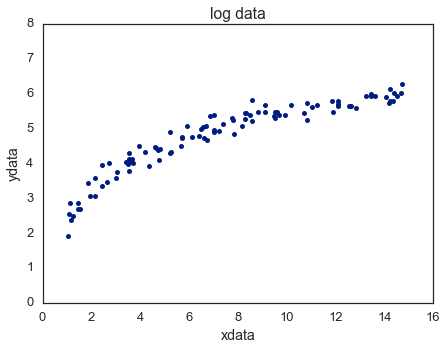

In [20]:
B0 = 2.3
B1 = 1.4
epsilon = np.random.normal(0, 0.2, len(logx))

ydata = B0 + B1 * logx + epsilon
data = pd.DataFrame({'xdata':xdata, 'ydata':ydata}).sort_values('xdata')

xlim = (0,16)
ylim = (0,8)
ax = data.plot('xdata', 'ydata', 
                marker='o', ls='', ms=5,
                xlim=xlim, ylim=ylim,
                legend=False, figsize=(7,5), color=colors[0])

_ = ax.set(xlabel='xdata', ylabel='ydata', title='log data')

In [21]:
model1 = sm.ols('ydata ~ np.power(xdata,2) + 1', data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ydata   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 24 Jul 2016   Prob (F-statistic):           2.80e-25
Time:                        10:01:55   Log-Likelihood:                -86.726
No. Observations:                 100   AIC:                             177.5
Df Residuals:                      98   BIC:                             182.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              3.8851      0.086     45.246      0.000         3.715     4.055
np.power(xdata, 2)     0.0125      0.001     14.081      0.000         0.011     0.014
==============================================================================
Omnibus:                       16.455   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.766
Skew:                          -0.971   Prob(JB):                     8.41e-05
Kurtosis:                       3.854   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

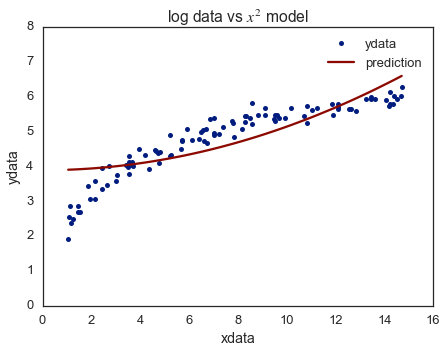

In [22]:
ax = data.plot('xdata', 'ydata', 
                marker='o', ls='', ms=5,
                xlim=xlim, ylim=ylim,
                legend=False, figsize=(7,5), color=colors[0])

plt.plot(data.xdata, model1.predict(), marker='', ls='-', label='prediction', color=colors[1])

_ = ax.set(xlabel='xdata', ylabel='ydata', title='log data vs $x^2$ model')
ax.legend(loc=0)

In [23]:
model2 = sm.ols('ydata ~ np.log(xdata) + 1', data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ydata   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2414.
Date:                Sun, 24 Jul 2016   Prob (F-statistic):           7.57e-71
Time:                        10:01:56   Log-Likelihood:                 20.159
No. Observations:                 100   AIC:                            -36.32
Df Residuals:                      98   BIC:                            -31.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.2854      0.054     41.972      0.000         2.177     2.393
np.log(xdata)     1.3864      0.028     49.137      0.000         1.330     1.442
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.367
Skew:                           0.274   Prob(JB):                        0.505
Kurtosis:                       2.831   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

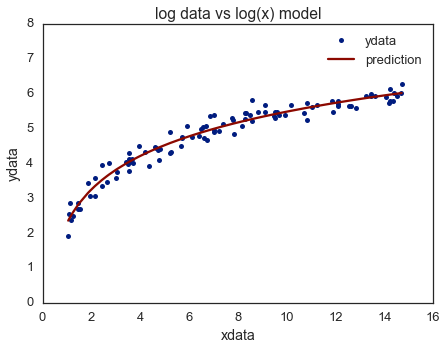

In [24]:
ax = data.plot('xdata', 'ydata', 
                marker='o', ls='', ms=5,
                xlim=xlim, ylim=ylim, color=colors[0],
                legend=False, figsize=(7,5))


plt.plot(data.xdata, model2.predict(), marker='', ls='-', label='prediction', color=colors[1])

_ = ax.set(xlabel='xdata', ylabel='ydata', title='log data vs log(x) model')
ax.legend(loc=0)

## Question 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

In [47]:
xdata = np.random.uniform(1, 15, 200)

B0 = 4.6
B1 = 0.4
B2 = 3.9
epsilon = np.random.normal(0, 20, len(xdata))

ydata = B0 + B1 * xdata + B2 * xdata**2 + epsilon


X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=4444)

train = pd.DataFrame({'xdata':X_train, 'ydata':y_train})
test = pd.DataFrame({'xdata':X_test, 'ydata':y_test})

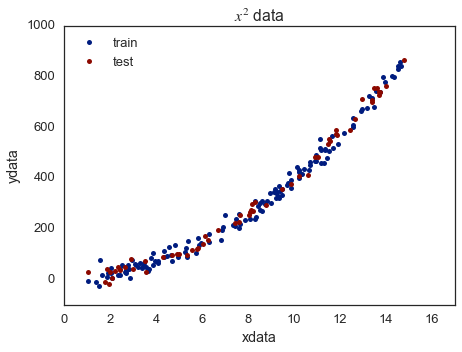

In [48]:
xlim=(0,17)
ylim=(-100, 1000)
ax = train.plot('xdata', 'ydata', 
                marker='o', ls='', ms=5,
                xlim=xlim, ylim=ylim,
                legend=False, figsize=(7,5), color=colors[0], label='train')

ax = test.plot('xdata', 'ydata', ax=ax,
                marker='o', ls='', ms=5,
                xlim=xlim, ylim=ylim,
                legend=False, figsize=(7,5), color=colors[1], label='test')

ax.legend(loc=0)
_ = ax.set(xlabel='xdata', ylabel='ydata', title='$x^2$ data')

In [49]:
model3 = sm.ols('ydata ~ np.power(xdata,2) + xdata + 1', train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ydata   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     8389.
Date:                Sun, 24 Jul 2016   Prob (F-statistic):          5.34e-144
Time:                        10:04:22   Log-Likelihood:                -627.70
No. Observations:                 140   AIC:                             1261.
Df Residuals:                     137   BIC:                             1270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             11.3352      7.340      1.544      0.125        -3.179    25.850
np.power(xdata, 2)     3.9602      0.137     28.918      0.000         3.689     4.231
xdata                 -1.0650      2.163     -0.492      0.623        -5.343     3.213
==============================================================================
Omnibus:                        2.229   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.988
Skew:                           0.291   Prob(JB):                        0.370
Kurtosis:                       3.031   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

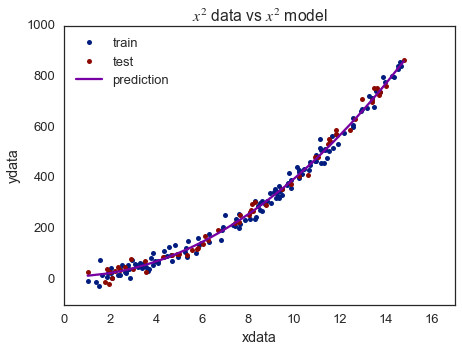

In [50]:
ax = train.plot('xdata', 'ydata', 
                marker='o', ls='', ms=5,
                xlim=xlim, ylim=ylim, color=colors[0],
                legend=False, figsize=(7,5), label='train')

ax = test.plot('xdata', 'ydata', ax=ax,
                marker='o', ls='', ms=5,
                xlim=xlim, ylim=ylim, color=colors[1],
                legend=False, figsize=(7,5), label='test')

predict = model3.predict(test.sort_values('xdata'))
plt.plot(test.xdata.sort_values(), predict, marker='', ls='-', label='prediction', color=colors[2])

_ = ax.set(xlabel='xdata', ylabel='ydata', title='$x^2$ data vs $x^2$ model')
ax.legend(loc=0)

In [51]:
pd.DataFrame({'rmse train':rmse(model3.predict(), train.ydata), 
              'rmse test':rmse(predict, test.ydata)}, 
             index=pd.Index([2]),
             columns=['rmse train','rmse test'])

,rmse train,rmse test
2,21.425925,374.499814


## Question 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [52]:
df_list = list()

for power in range(8):
    
    # Make the formula
    model_str = ['1'] + ['np.power(xdata,{})'.format(x+1)  if x>0 else 'xdata' for x in range(power)]
    model_str = 'ydata ~ ' + ' + '.join(model_str)
    
    # Fit the model
    model = sm.ols(model_str, train).fit()
    predict = model.predict(test)
    
    # Append statistics to a datafame
    df_list.append(pd.DataFrame({'rmse train':rmse(model.predict(), train.ydata), 
                                 'rmse test':rmse(predict, test.ydata),
                                 'r_squared':model.rsquared,
                                 'aic':model.aic,
                                 'bic':model.bic}, 
                                index=pd.Index([power], name='power'),
                                columns=['rmse train','rmse test','r_squared','aic','bic']))
                   
df = pd.concat(df_list).reset_index()
df

,power,rmse train,rmse test,r_squared,aic,bic
0,0,238.081318,262.129270,0.000000,1931.634230,1934.575872
1,1,57.107632,60.028449,0.942464,1533.885362,1539.768647
2,2,21.425925,18.779566,0.991901,1261.391249,1270.216176
3,3,21.267915,19.196821,0.992020,1261.318672,1273.085242
4,4,21.236080,19.070886,0.992044,1262.899249,1277.607461
5,5,21.199664,19.238886,0.992071,1264.418686,1282.068541
6,6,21.196736,19.263674,0.992073,1266.380002,1286.971499
7,7,21.185169,19.237366,0.992082,1268.227174,1291.760314


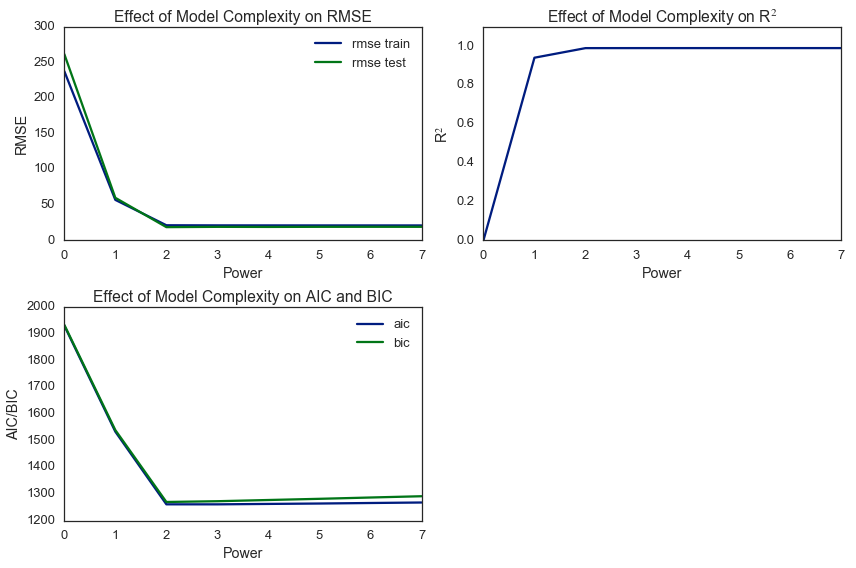

In [53]:
f, axList = plt.subplots(ncols=2, nrows=2)
f.set_size_inches(12,8)
axList = axList.flatten()

df.plot('power', ['rmse train', 'rmse test'], ax=axList[0])
_ = axList[0].set(xlabel='Power', ylabel='RMSE', title='Effect of Model Complexity on RMSE')

df.plot('power', 'r_squared', ax=axList[1], legend=False, ylim=(0,1.1))
_ = axList[1].set(xlabel='Power', ylabel='R$^2$', title='Effect of Model Complexity on R$^2$')

df.plot('power', ['aic','bic'], ax=axList[2])
_ = axList[2].set(xlabel='Power', ylabel='AIC/BIC', title='Effect of Model Complexity on AIC and BIC')

axList[-1].axis('off')
plt.tight_layout()

## Question 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [54]:
model_str = 'ydata ~ np.power(xdata,2) + xdata + 1'

df_list = list()
for npoints in np.arange(5,(len(train)/5+1)*5,5):
    # Fit a model with some of the points
    model = sm.ols(model_str, train.iloc[:npoints]).fit()
    predict = model.predict(test)
    
    # Append statistics to a datafame
    df_list.append(pd.DataFrame({'train':model.mse_resid, 
                                 'test':(predict - test.ydata).pow(2).mean()},
                                index=pd.Index([npoints], name='npoints'),
                                columns=['train','test']))

df = pd.concat(df_list).reset_index()
df.head()

,npoints,train,test
0,5,352.594609,658.455923
1,10,176.893158,917.703338
2,15,318.073093,517.979804
3,20,384.321369,605.924500
4,25,424.854060,408.883573


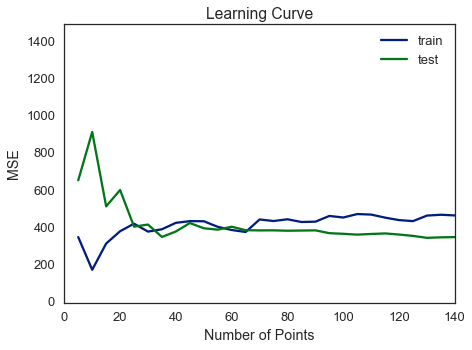

In [55]:
ax = df.plot('npoints', ['train', 'test'],
                marker='', ls='-',
                xlim=(0,140), ylim=(0,1500),
                figsize=(7,5))
_ = ax.set(xlabel='Number of Points', ylabel='MSE', title='Learning Curve')